# Google Play Store Exploratory Data Analysis

Congratulations! You've been hired by APPDEV Inc. as their latest Data Science Intern, to help them derive insights from a Google Play Store dataset they've provided, in order to help them know what type of apps they can make next, that will fetch them lots of users and in turn, more revenue.

Your tasks are very simple, as they have been very much outlined for you...
all you just have to do is follow them intuitively, and you might wanna take some notes along the way.

Good luck!

ue.

Your tasks are very simple, as they have been very much outlined for you...
all you just have to do is follow them intuitively, and you might wanna take some notes along the way.

Good luck!

In [13]:
# Run this cell and the next to install and import the required packages.
! pip install pandas matplotlib seaborn scipy

In [14]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time to explore your data

1. read in the CSV file
2. print the first 10 rows

In [15]:
google_play = pd.read_csv(r"C:\Users\user\Documents\code-j\my_env\googleplaystore.csv")
google_play.head(10)



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


3. check out more `info` about the data. 

In [16]:
google_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


4. seems like there are some missing values, find out how many there are...

In [17]:
google_play.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

5. are there `duplicated` values as well?

No there are no duplicates at all as the number of rows for the duplicate is equal to the original 

In [18]:
duplicates = google_play.duplicated()
dup_count = duplicates.count()
print(dup_count)

10841


# Now, let's clean the dirty data

Natural instinct is we drop the rows containing the missing values, right?
but we will be losing lots of data if we do that, let's try this instead:

1. define a threshold that won't allow lose of data above 5% of the whole dataset.
2. fetch the columns with missing values less than our set threshold into a list.
3. drop the missing values in the rows of the collected columns from the original dataset.
4. drop the duplicates as well, if there are any.
5. now, let's recheck the `info` of our data.

In [19]:

total_rows = len(google_play)
max_rows_to_drop = int(total_rows * 0.05)

missing_col = google_play.isna().mean() * 100
threshold = 5
col_below_threshold = missing_col[missing_col <= threshold].index.to_list()

# Drop rows that do not meet the threshold
google_play_cleaned = google_play.dropna(subset=col_below_threshold)
google_play_cleaned = google_play_cleaned.drop_duplicates()

google_play_cleaned.info()




<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          8886 non-null   float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


our data doesn't seem to look much as if we picked it from a dump site like it did earlier, right?
well, we are not there yet, as we still have some missing data in the `Rating` column, let's see how we can fill that void and make our data as white as snow, so, stay with me (^_^)...

6. `group` the data `by` the `Installs` column and compute the `median` of the `Rating` column, store the result as a dictionary.
7. on the original dataset, `fill` the missing values of the `Rating` column by `mapping` the dictionary on the `Installs` column.
8. if you check our data now, you'll realize there are still some missing values as we couldn't fill them all, but not to worry, you can `drop` these ones, since they are not much.
9. recheck our data now, looks perfect, doesn't it? 

Notes : After mapping the values on the dictionary to the `Installs` and using them to fill the missing values on the   `Rating` column, the number of non-null increased from `8886` to `10332`

In [20]:
google_grouped_dict = google_play_cleaned.groupby("Installs")["Rating"].median().to_dict()
google_grouped_dict

# Mapping the values on the install column
google_mapped = google_play_cleaned["Installs"].map(google_grouped_dict)
google_mapped

# Filling the mapped values in our Rating columns
google_play_cleaned["Rating"] = google_play_cleaned["Rating"].fillna(google_mapped)
google_play_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10332 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Let's perform some transformation magic

If you take a look at the first few rows of our dataset, you'll notice that the `Installs` column has commas and plus signs, they should be numbers, but when you check the data type of this column and that of `Reviews`, you see that they are objects, we need to make them integers, as we will need them later:

1. replace the comma sign in the `Installs` column with nothing.
2. do the same for the plus sign.
3. now, convert the data type of the `Installs` column to integer.
4. do the same for the `Reviews` column.
5. recheck the original dataset to see if the changes have taken place.

(*you might wanna take some notes here*)

In [21]:
# #Replacing the commas and plus sign in Installs & Review column with nothing
# google_play_cleaned['Installs'] = google_play_cleaned['Installs'].replace(',', '').replace('+', '').astype(float)
# google_play_cleaned['Reviews'] = google_play_cleaned['Reviews'].replace(',', '').replace('+', '').astype(int)
# google_play_cleaned.info()

# Time for some Visual Scenes

APPDEV Inc. wants to know what category has the most apps and which has the least...

Let's explore some distributions on the App Categories:

1. create a histogram plot on the `Category` column.
2. label the x-axis: `Category of Apps on PlayStore`, y-axis: `Count of Apps in each Category`, title: `Distribution of App Categories`.
3. show the plot. 

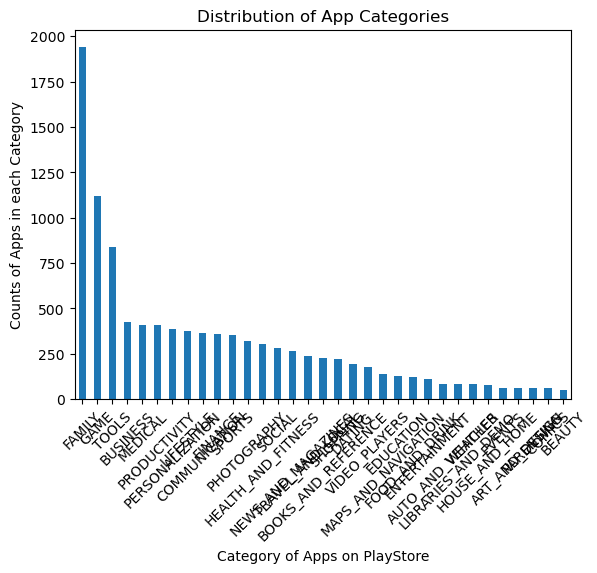

In [ ]:
google_play_cleaned['Category'].value_counts().plot(kind='bar') 
plt.xlabel('Category of Apps on PlayStore')
plt.ylabel('Counts of Apps in each Category')
plt.title('Distribution of App Categories')
plt.xticks(rotation = 90)
plt.show()

oh my..., that doesn't look like much, we can't derive good insights from it, looks kinda ugly, right?, especially the x-axis, urgh!
well, let's add some cosmetics:

1. copy the code from the previous cell into the next.
2. this time, change the plot into a `countplot` from the seaborn package.
3. add a figure size of 10 by 6, to make it look bigger, do this at the very first line of the cell.
4. you can add `grid` lines, to add a touch of accuracy in reading.
5. the labels stay the same, but add an `xticks` with a `rotation` of 90 degrees.
6. let's add some coloration to the `countplot` to improve the beauty: `hue='Category'`.
7. now, let's behold the beauty.

(*take some notes here*)

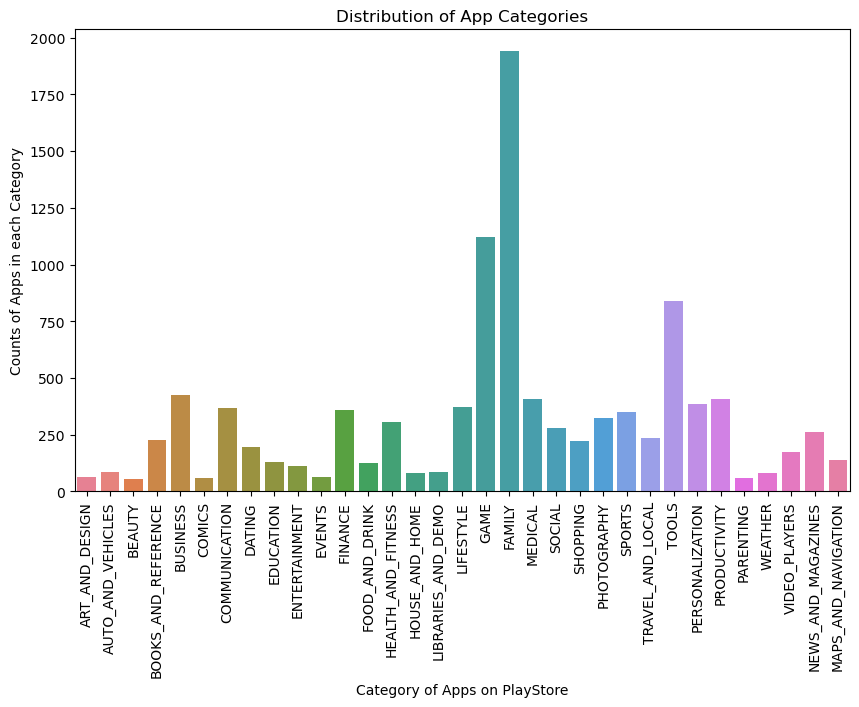

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=google_play_cleaned, x='Category', hue='Category')
plt.xlabel('Category of Apps on PlayStore')
plt.ylabel('Counts of Apps in each Category')
plt.title('Distribution of App Categories')
plt.xticks(rotation=90)
plt.show()

...looked really good, right?

now, APPDEV Inc. wants to know if there is any correlation between ratings and reviews... 

let's perform couple more visuals, this time, on the relationship between the `Reviews` and `Rating`:

1. set the figure size like you did earlier.
2. construct the `Rating` column against the `Reviews` column on a `scatterplot`.
3. label the x-axis: `Number of Reviews` and the title: `Relationship between Reviews and Ratings`.
4. now, `show` your plot.

(*take some notes here*)

<Figure size 1000x600 with 0 Axes>

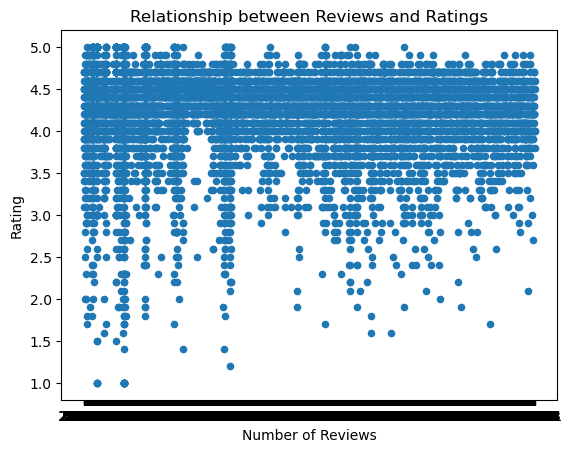

In [24]:
plt.figure(figsize=(10, 6))
google_play_cleaned.plot(x='Reviews', y='Rating', kind='scatter')
plt.xlabel('Number of Reviews')
plt.title('Relationship between Reviews and Ratings')
plt.show()

...that was owkae.

moving on, APPDEV Inc. wants to know which category has more installs...

let's find out the distribution of `Installs` across the Categories:

1. use a `boxplot` to construct the `Installs` column against the `Category` column.
2. label the x-axis: `Category of Apps on PlayStore`, y-axis: `Amount of Installs in each Category`, title: `Distribution of Installs across Categories`.
3. show the plot. 

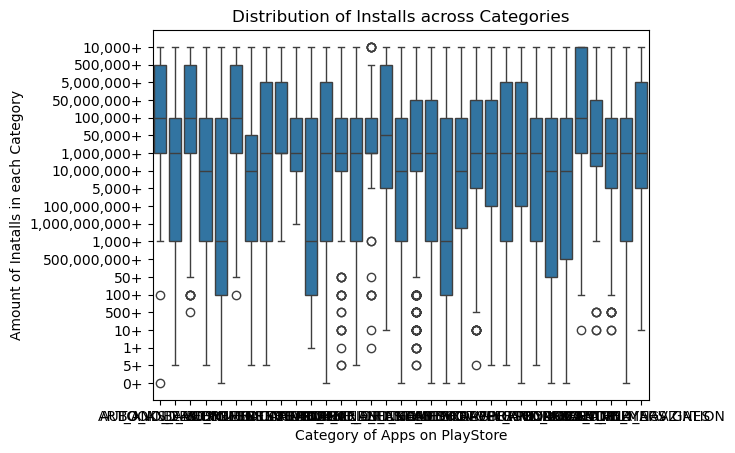

In [25]:
sns.boxplot(data=google_play_cleaned, x='Category', y='Installs')
plt.xlabel('Category of Apps on PlayStore')
plt.ylabel('Amount of Inatalls in each Category')
plt.title('Distribution of Installs across Categories')
plt.show()

what is this? (\*o*)...

I bet that was the expression on your face.

yeah, it looked ridiculous, right?, even worse than the last one, we definitely can't make sense of this and the board might have a heart attack if we present this to them...

so many outliers, let's fix that:

1. create another column, in the original dataset, called `Installs_log`, perform a logarithmic computation on the `Installs` column using the `log()` method from the numpy package and save to the new column.
2. subset both columns from the original dataset to view the first 5 rows side by side.

In [26]:
google_play_cleaned['Installs_log'] = np.log(google_play_cleaned['Installs'])
new_col = google_play_cleaned[['Installs','Installs_log']]
new_col.head(5)

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

now, let's construct the `boxplot` again, this time, with beauty:

1. copy the code from the previous cell into the next.
2. add a figure size of 10 by 6
3. use `Installs_log` instead of `Installs`.
4. add some coloration to the plot using the `Category` column.
5. the labels stay the same, but make the y-axis label: `Log-Amount of Installs in each Category` and add a `rotation` of 90 degrees.
6. now, let's behold the beauty.

(*you might wanna take some notes here*)

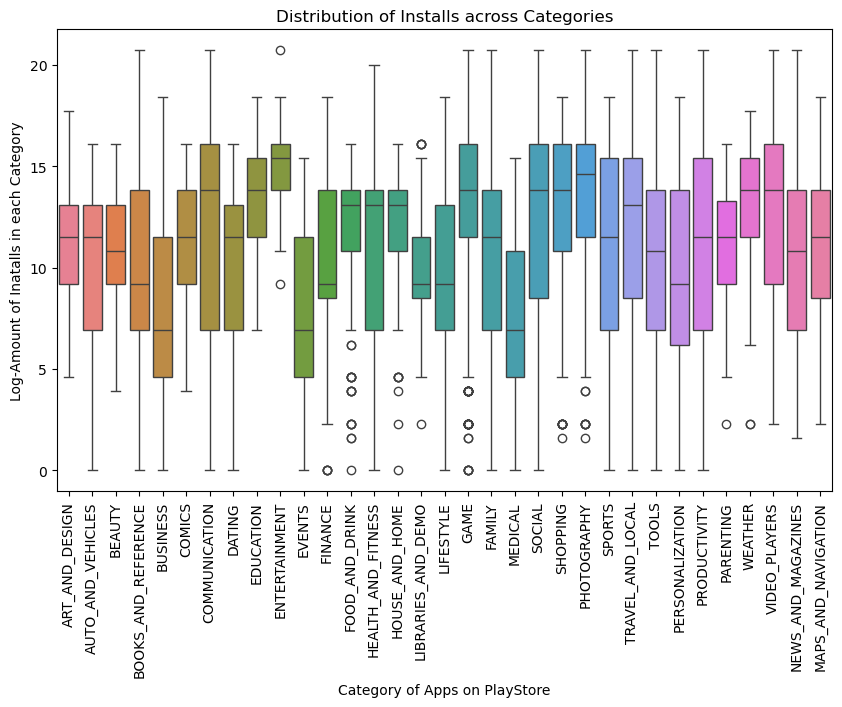

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=google_play_cleaned, x='Category', y='Installs_log', hue='Category')
plt.xlabel('Category of Apps on PlayStore')
plt.ylabel('Log-Amount of Inatalls in each Category')
plt.title('Distribution of Installs across Categories')
plt.xticks(rotation=90)
plt.show()

...wow, looks perfect, doesn't it? (^_^).

# We have an Hypothesis...

A thought just crossed the MD's mind, he's curious to know if there's any difference in the ratings of paid apps vs. free apps, he's come to your desk and asked you to get rid of his curiousity... 

how do we go about this?, let's find out:

1. import `ttest_ind` from `stats` module of the `scipy` package, so we can find out what's up between these `two independent` variables.
2. subset the original dataset to filter out the free apps from the `Type` column, save the new DataFrame in `free_apps`.
3. do the same for paid apps, save to `paid_apps`.

In [ ]:
from scipy.stats import ttest_ind
free_apps = google_play_cleaned[google_play_cleaned['Type'] == 'Free']
paid_apps = google_play_cleaned[google_play_cleaned['Type'] == 'Paid']

free_apps.head(10)


you've been provided an alpha value and test result variables have been set for you, now:

1. conduct the test, using the `Rating` column of the free apps against that of the paid apps
2. create a result dictionary that takes the `p_value` as a key, then the value should be `Reject null hypothesis: There is a significant difference in ratings.` if the p_value was less than the alpha value, or `Failed to reject null hypothesis: There is no significant difference in ratings.` if not.
3. print the result.

(*take some notes here*)

In [ ]:
alpha = 0.05
# subset the ratings column of the free app and paid apps
free_apps_ratings = free_apps['Rating']
paid_apps_ratings = paid_apps['Rating']

# Conduct the independent t-test
t_statistic, p_value = ttest_ind(free_apps_ratings, paid_apps_ratings)

# Create the result dictionary based on the p-value
result = {
    'p_value': p_value,
    'hypothesis_test_result': (
        'Reject null hypothesis: There is a significant difference in ratings.' 
        if p_value < alpha 
        else 'Failed to reject null hypothesis: There is no significant difference in ratings.'
    )
}
print(result)

{'p_value': nan, 'hypothesis_test_result': 'Failed to reject null hypothesis: There is no significant difference in ratings.'}


# Well Done!

Wow, great job so far...
you've really done well.

but, it's not over... just one last thing tho:

* now that you've explored, cleaned and derived some insights from the data, it's time for you to present what you've found
* you have the whole of APPDEV Inc. in front of you, based on the notes you've taken, tell them a story to remember, one that they can make informed decision from.

Good luck! (^_^)